# Descrição do caso


**Resumo:**  
O artigo descreve um lactente chinês de 7 meses com pneumonia grave, bronquite plástica e infecções respiratórias recorrentes que, apesar de teste do suor negativo, apresentou duas mutações germinativas compostas no gene CFTR: p.E217G e p.V470M. O trio-exoma revelou ambas como mutações homozigotas no paciente, com segregação heterozigota nos pais. Segundo as diretrizes ACMG, p.E217G é variante de significado incerto e p.V470M é benigna; ferramentas preditivas e simulações de dinâmica molecular mostraram que, juntas, essas variantes desestabilizam a proteína CFTR, sugerindo efeito patogênico combinado. O caso ilustra como a integração de GATK HaplotypeCaller, anotação multiparamétrica e critérios ACMG pode esclarecer diagnósticos de fibrose cística mesmo quando exames tradicionais são inconclusivos.  
Mais detalhes no [artigo de leitura prévia](https://www.frontiersin.org/journals/pediatrics/articles/10.3389/fped.2025.1574919/full).  

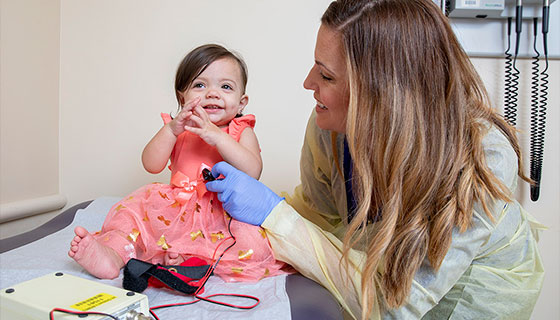.  
Fonte: [John Hopkins Hospital](https://www.hopkinsmedicine.org/health/conditions-and-diseases/cystic-fibrosis/patient-story-evelyn)

# Planejamento do Pipeline


Antes de começar a resolver o caso, vamos tirar um tempo para planejamento. A primeira coisa, é entender o que temos de dados e o que o médico quer obter de resultado:  

```
Resp:
# Detalhes do exame realizado:
sequenciamento genético (exoma completo) para detectar variantes no gene CFTR.
# Detalhes do tipo de dados gerados:
dados genômicos (leituras FASTQ → variantes VCF) analisados por predição in silico e modelagem estrutural.
# Resultados esperados pelo médico:
identificação de mutações patogênicas no CFTR que expliquem o quadro clínico compatível com fibrose cística, 
com avaliação do impacto funcional das variantes.
```



Com base em tudo que vocês já aprenderam, quais seriam os principais passos? Preencha o esquema abaixo com o seu planejamento.


```
Dados brutos -> relatorio Fastq -> Limpeza -> alinhamento e chamada das variantes -> Analise das variantes -> Relatorio final
```


Agora, vamos fazer o planejamento de ferramentas que serão utilizadas. Para cada uma das etapas listadas acima, liste possíveis ferramentas utilizadas nesta etapa:  


```
Resp:
Fastq = fastqc
Limpeza = cutadapat
alinhamento  = bwa
chamada de variantes = samtools, freebayes e IGV
...
```




Agora para cada etapa/ferramenta, liste os arquivos de input necessários:  

```
Resp:
Fastq e limpeza= .fastas ou .fastqs
alinhamento = .fastas de referencia e os trimmeds do paciente
chamada de variantes = .bams, .bais e os fastas de referencia
...
```



# Análise das Variantes no Gene CFTR

In [2]:
%%bash
#0. entrar no env
cd ..
source ./activateEnv.sh


In [ ]:
%%bash
# Instalar os software que vamos usar nesta prática
mamba install -c bioconda -c conda-forge fastqc bwa gatk4 cutadapt samtools bedtools ensembl-vep=115 -y

In [6]:
%%bash

mkdir fastq bwa bed cutadapt raw
mv *.fastq.gz raw/
mv *.fasta.gz bwa/


In [7]:
%%bash 
fastqc -o fastq/ raw/patient-cistic-fibrosis_R1.fastq.gz raw/patient-cistic-fibrosis_R2.fastq.gz
cutadapt \
  -u 5 -U 5 \
  -u -5 -U -5 \
  -m 90 \
  -o cutadapt/patient-cistic-fibrosis-trimmed_R1.fastq.gz \
  -p cutadapt/patient-cistic-fibrosis-trimmed_R2.fastq.gz \
  raw/patient-cistic-fibrosis_R1.fastq.gz \
  raw/patient-cistic-fibrosis_R2.fastq.gz


application/gzip
application/gzip


Started analysis of patient-cistic-fibrosis_R1.fastq.gz
Approx 5% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 10% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 15% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 20% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 25% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 30% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 35% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 40% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 45% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 50% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 55% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 60% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 65% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 70% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 75% complete for patient-cistic-fibrosis_R1.fastq.gz
Approx 80% complete for patient-cistic-fibros

Analysis complete for patient-cistic-fibrosis_R1.fastq.gz


Started analysis of patient-cistic-fibrosis_R2.fastq.gz
Approx 5% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 10% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 15% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 20% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 25% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 30% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 35% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 40% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 45% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 50% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 55% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 60% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 65% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 70% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 75% complete for patient-cistic-fibrosis_R2.fastq.gz
Approx 80% complete for patient-cistic-fibros

Analysis complete for patient-cistic-fibrosis_R2.fastq.gz
This is cutadapt 5.1 with Python 3.10.14
Command line parameters: -u 5 -U 5 -u -5 -U -5 -m 90 -o cutadapt/patient-cistic-fibrosis-trimmed_R1.fastq.gz -p cutadapt/patient-cistic-fibrosis-trimmed_R2.fastq.gz raw/patient-cistic-fibrosis_R1.fastq.gz raw/patient-cistic-fibrosis_R2.fastq.gz
Processing paired-end reads on 1 core ...

=== Summary ===

Total read pairs processed:            200,000

== Read fate breakdown ==
Pairs that were too short:               2,221 (1.1%)
Pairs written (passing filters):       197,779 (98.9%)

Total basepairs processed:    52,011,441 bp
  Read 1:    26,002,514 bp
  Read 2:    26,008,927 bp
Total written (filtered):     47,554,220 bp (91.4%)
  Read 1:    23,776,447 bp
  Read 2:    23,777,773 bp


In [11]:
%%bash
#1o indexa contra o genoma humano pra depois alinhar
samtools faidx reference/Chr7-reference.fasta
bwa index reference/Chr7-reference.fasta

bwa mem reference/Chr7-reference.fasta \
  -R '@RG\tID:sample1\tSM:sample1\tPL:ILLUMINA\tLB:lib1\tPU:unit1' \
  cutadapt/patient-cistic-fibrosis-trimmed_R1.fastq.gz \
  cutadapt/patient-cistic-fibrosis-trimmed_R2.fastq.gz \
  | samtools sort -o bwa/patient-cistic-fibrosis-mapped-host.bam
  
  samtools index bwa/patient-cistic-fibrosis-mapped-host.bam

[bwa_index] Pack FASTA... 0.32 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=318691946, availableWord=34423912
[BWTIncConstructFromPacked] 10 iterations done. 56784042 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 104904522 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 147670090 characters processed.
[BWTIncConstructFromPacked] 40 iterations done. 185676202 characters processed.
[BWTIncConstructFromPacked] 50 iterations done. 219452122 characters processed.
[BWTIncConstructFromPacked] 60 iterations done. 249468234 characters processed.
[BWTIncConstructFromPacked] 70 iterations done. 276142554 characters processed.
[BWTIncConstructFromPacked] 80 iterations done. 299846746 characters processed.
[bwt_gen] Finished constructing BWT in 89 iterations.
[bwa_index] 45.94 seconds elapse.
[bwa_index] Update BWT... 0.31 sec
[bwa_index] Pack forward-only FASTA... 0.18 sec
[bwa_index] Construct SA from BWT and Occ.

Para trazer contexto para sua análise, usando o software [IGV](https://igv.org/doc/desktop/#DownloadPage/) instalado no seu próprio computador:  
- Tente encontrar o gene CFTR no genoma humano
- Encontre as duas posições exatas das variantes reportadas no caso
```
# Resp:Nao consegui achar o chr7 
```
- Descreva a alteração que aconteceu em cada códon e o seu efeito na proteína

```
# Resp:
```



In [13]:
%%bash
# Indexar a referência e BAM para chamada de variantes com GATK
samtools dict reference/Chr7-reference.fasta > reference/Chr7-reference.dict
samtools index bwa/patient-cistic-fibrosis-mapped-host.bam

gatk HaplotypeCaller \
  -R reference/Chr7-reference.fasta \
  -I bwa/patient-cistic-fibrosis-mapped-host.bam \
  -O gatk/patient-cistic-fibrosis-host-variants.vcf

Using GATK jar /home/figa/Documents/Programming/VSCode/Metagenomics-Course/env/share/gatk4-4.6.2.0-1/gatk-package-4.6.2.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /home/figa/Documents/Programming/VSCode/Metagenomics-Course/env/share/gatk4-4.6.2.0-1/gatk-package-4.6.2.0-local.jar HaplotypeCaller -R reference/Chr7-reference.fasta -I bwa/patient-cistic-fibrosis-mapped-host.bam -O gatk/patient-cistic-fibrosis-host-variants.vcf
12:14:49.308 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/home/figa/Documents/Programming/VSCode/Metagenomics-Course/env/share/gatk4-4.6.2.0-1/gatk-package-4.6.2.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
12:14:49.374 INFO  HaplotypeCaller - ------------------------------------------------------------
12:14:49.375 INFO  HaplotypeCaller - The Genome Analysis Toolkit (GATK) v4.6.2.0
1

# Anotação de Variantes

In [14]:
%%bash
vep_install -a cf -s homo_sapiens -y GRCh38 --NO_UPDATE ##baixa o genoma humano
##Oh fuck.

 - getting list of available cache files
 - downloading https://ftp.ensembl.org/pub/release-115/variation/indexed_vep_cache/homo_sapiens_vep_115_GRCh38.tar.gz
 - unpacking homo_sapiens_vep_115_GRCh38.tar.gz
 - converting cache, this may take some time but will allow VEP to look up variants and frequency data much faster
 - use CTRL-C to cancel if you do not wish to convert this cache now (you may run convert_cache.pl later)
2025-10-12 12:37:45 - Processing homo_sapiens
2025-10-12 12:37:45 - Processing version 115_GRCh38
2025-10-12 12:37:45 - No unprocessed types remaining, skipping
2025-10-12 12:37:45 - All done!
 - downloading Homo_sapiens.GRCh38.dna.toplevel.fa.gz
 - downloading Homo_sapiens.GRCh38.dna.toplevel.fa.gz.fai
 - downloading Homo_sapiens.GRCh38.dna.toplevel.fa.gz.gzi

The FASTA file should be automatically detected by the VEP when using --cache or --offline.
If it is not, use "--fasta /home/figa/.vep/homo_sapiens/115_GRCh38/Homo_sapiens.GRCh38.dna.toplevel.fa.gz"


All don

In [15]:
%%bash
bgzip gatk/patient-cistic-fibrosis-host-variants.vcf
tabix -p vcf gatk/patient-cistic-fibrosis-host-variants.vcf.gz
#gera os arquivos VCF para char o gene correto

In [17]:
%%bash
# Anotação de variantes a nível de proteína
vep -i gatk/patient-cistic-fibrosis-host-variants.vcf.gz \
    --output_file vep/patient-cistic-fibrosis-host-variants.vep.tsv \
    --tab --force_overwrite \
    --offline --cache --dir_cache ~/.vep \
    --assembly GRCh38 \
    --symbol --hgvs --canonical --af_1kg --max_af \
    --everything --pick\
    --stats_file vep/patient-cistic-fibrosis-host-variants.vep.html